In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch
from matplotlib.font_manager import FontProperties
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt



In [2]:
data = np.load('g_Na=120_g_K=36_g_L=0.3.npz')
x = data['t']
v = data['v']
m = data['m']
h = data['h']
n = data['n']

x = np.vstack(([x]*4)) 
v = np.vstack(([v]*4))

ss_input = MinMaxScaler()
ss_output = MinMaxScaler()
data_set_input = ss_input.fit_transform(x)
data_set_output = ss_output.fit_transform(v)

In [3]:
data_set_input.shape

(2800, 1)

In [4]:
num = 700*3
train_set_input = data_set_input[0:num, :]
train_set_output = data_set_output[0:num, :]
test_set_input = data_set_input[num+1:, :]
test_set_output = data_set_output[num+1:, :]

In [5]:
train_set_output.shape

(2100, 1)

In [6]:
train_set_input.shape

(2100, 1)

In [7]:
# 2 构建网络
net = nn.Sequential(
    nn.Linear(1, num),
    nn.ReLU(),
    nn.Linear(num, num-1000),
    nn.ReLU(),
    nn.Linear(num-1000,num-2000),
    nn.ReLU(),
    nn.Linear(num-2000,50),
    nn.ReLU(),
    
    nn.Linear(50,1),
    nn.Sigmoid(),
)



# 3 定义优化器和损失函数
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.5) 

# 4 训练网络
max_epoch = 3000
l_arr = []
for i in range(max_epoch):
    predict = net(torch.FloatTensor(train_set_input))
    l = loss(torch.FloatTensor(train_set_output), predict)
    optimizer.zero_grad()    
    l.backward()
    optimizer.step()
    l_arr.append(l.item())


In [8]:
net

Sequential(
  (0): Linear(in_features=1, out_features=2100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2100, out_features=1100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1100, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=50, bias=True)
  (7): ReLU()
  (8): Linear(in_features=50, out_features=1, bias=True)
  (9): Sigmoid()
)

In [9]:
predict = net(torch.FloatTensor(test_set_input))
test_loss = loss(torch.FloatTensor(test_set_output), predict)
print('train_loss:%.6f , test_loss:%.6f' % (torch.FloatTensor(l_arr).mean(), test_loss))


train_loss:0.005284 , test_loss:0.000367


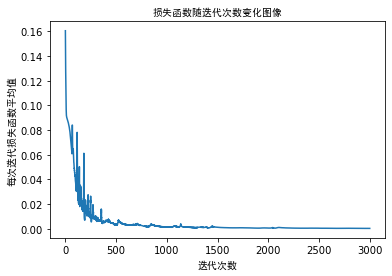

In [10]:
x = np.arange(max_epoch)
y = np.array(l_arr)
myfont = FontProperties(fname='./SimHei.ttf')
plt.plot(x, y)
plt.title('损失函数随迭代次数变化图像', fontproperties=myfont)
plt.xlabel('迭代次数', fontproperties=myfont)
plt.ylabel('每次迭代损失函数平均值', fontproperties=myfont)
plt.show()


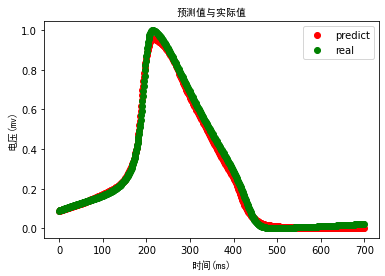

In [11]:
x = np.arange(test_set_input.shape[0])
y1 = np.array(predict.detach().numpy())
y2 = np.array(test_set_output)
myfont = FontProperties(fname='Simhei.ttf')
line1 = plt.scatter(x, y1, c='red')
line2 = plt.scatter(x, y2, c='g')
plt.legend([line1, line2], ["predict", "real"], loc=1)
plt.title('预测值与实际值', fontproperties=myfont)
plt.xlabel('时间(ms)', fontproperties=myfont)
plt.ylabel('电压(mv)', fontproperties=myfont)
plt.show()


In [12]:
# ps 查看权重
for param in net.parameters():
    print(param.shape)
    print(param.data)


torch.Size([2100, 1])
tensor([[-0.1770],
        [ 0.8517],
        [ 0.6635],
        ...,
        [ 0.4227],
        [-0.0851],
        [ 0.8355]])
torch.Size([2100])
tensor([-0.7773,  0.7869, -0.4781,  ..., -0.3715,  0.2866,  0.2280])
torch.Size([1100, 2100])
tensor([[ 0.0202, -0.0113,  0.0051,  ..., -0.0002, -0.0189, -0.0172],
        [-0.0139, -0.0166,  0.0026,  ...,  0.0069, -0.0118,  0.0032],
        [-0.0199,  0.0136, -0.0103,  ..., -0.0144, -0.0070, -0.0065],
        ...,
        [ 0.0152,  0.0085, -0.0093,  ..., -0.0012, -0.0121,  0.0122],
        [ 0.0096,  0.0174, -0.0159,  ...,  0.0004,  0.0090,  0.0021],
        [-0.0177, -0.0073,  0.0004,  ...,  0.0012,  0.0081,  0.0079]])
torch.Size([1100])
tensor([ 0.0158,  0.0144,  0.0202,  ...,  0.0200, -0.0131, -0.0123])
torch.Size([100, 1100])
tensor([[ 0.0299,  0.0037,  0.0296,  ..., -0.0153, -0.0265, -0.0086],
        [ 0.0136,  0.0030,  0.0187,  ..., -0.0276,  0.0202,  0.0219],
        [ 0.0039,  0.0107, -0.0062,  ...,  0.0032, 